In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import glob

sns.set_theme(context='paper', style='whitegrid', font_scale=1)

In [45]:
config="medium-*"
experiment="*"
metric="duration"
statistic="p50"

g = f"result/{experiment}/*-{config}-{metric}.csv"

# Create an empty list to store individual dataframes
dataframes = []

# Iterate over each CSV file using glob
for file in glob.glob(g):
    # Read the CSV file into a dataframe
    df = pd.read_csv(file)
    # Add a new column with the filename
    df['filename'] = file

    df = df.iloc[-2:-1]

    # Append the dataframe to the list
    dataframes.append(df)

# Concatenate all dataframes into a single dataframe
df = pd.concat(dataframes, ignore_index=True)
df = df.drop("filename", axis=1)
print(df.head())
df = df.groupby(["experiment", "task", "config", "timestamp"]).mean()
df = df.sort_values(["experiment", "task"])

# print(df.head())
g = sns.catplot(data=df, x="task", y=statistic, hue="experiment", kind="bar", aspect=2, ci="sd")
g.set_titles(template="")
g.set_xticklabels(rotation=30)

# for i, row in df.iterrows():
#     x_pos = g.ax.get_xticks()[i]  # Get the categorical x-axis position
#     plt.errorbar(x_pos, row['p50'], yerr=[[row['p50'] - row['p10']], [row['p90'] - row['p50']]], color='k')

# plt.tight_layout()

  experiment                   task            config   
0   baseline                  login  medium-330s-r100  \
1   baseline                gateway  medium-330s-r100   
2   baseline                  total  medium-330s-r100   
3   baseline              recommend  medium-330s-r100   
4   baseline  get-user-reservations  medium-330s-r100   

                   timestamp        avg            sum     max    min   
0  2023-05-23 10:00:00+00:00   4.298123   16117.959999   57.78   3.03  \
1  2023-05-23 10:00:00+00:00  21.461254  643837.629574  257.24  11.12   
2  2023-05-23 10:00:00+00:00  14.762335  885740.099499  257.24   3.03   
3  2023-05-23 10:00:00+00:00  11.158963   20554.809999   59.53   7.91   
4  2023-05-23 10:00:00+00:00   5.760736   21602.759998   65.32   3.56   

         p01        p10        p50        p90        p99  
0   3.152006   3.337341   3.789609   5.054470  12.013214  
1  13.559702  15.886173  20.301460  28.008338  41.403583  
2   3.447298   4.370242  15.383808  25.02

ValueError: Could not interpret input 'task'

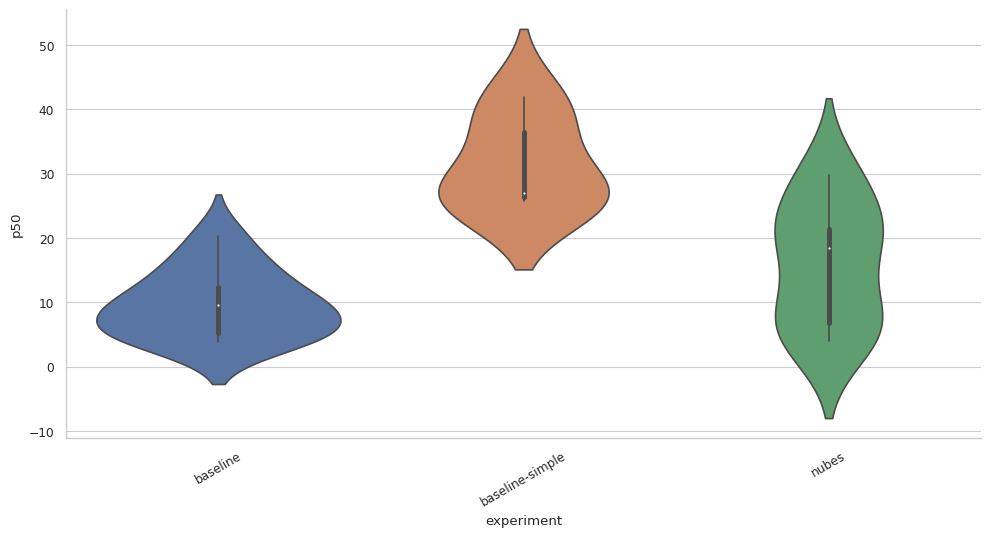

In [ ]:
g = sns.catplot(data=df, x="experiment", y=statistic, kind="violin", aspect=2)
g.set_titles(template="{title}")
g.set_xticklabels(rotation=30)
